# 2021/11/5
# 本代码绘制famil控制实验以及敏感性实验中的越赤道气流降水的协同变化

In [1]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *

In [2]:
path    =  "/home/sun/qomo-data/zhuang_plev/"

level   =  950

f1      =  xr.open_dataset(path+"plev_con_U.nc").sel(lev=level)
f2      =  xr.open_dataset(path+"plev_con_V.nc").sel(lev=level)
f3      =  xr.open_dataset(path+"plev_id_U.nc").sel(lev=level)
f4      =  xr.open_dataset(path+"plev_id_V.nc").sel(lev=level)

# 生成一个数组储存单层气流
u_con      =  f1.U
v_con      =  f2.V
u_id       =  f3.U
v_id       =  f4.V

# 降水数据
prect_con  =  xr.open_dataset(path+"famil_zhuang_con_prect.nc").prect
prect_id   =  xr.open_dataset(path+"famil_zhuang_id_prect.nc").prect



In [3]:
# 设计个给出经纬度计算区域平均的函数
def cal_regional_average(var,axis_turple):
    average_data  =  np.zeros((var.shape[0]))

    for i in range(0,var.shape[0]):
        average_data[i]  =  np.nanmean(var.sel(lat=slice(axis_turple[0],axis_turple[1]),lon=slice(axis_turple[2],axis_turple[3])).data[i,:])
    
    return average_data

# 现在开始对印度洋的越赤道气流进行统计分析
# 40-50 50-60 60-70 70-80 80-90 90-100
# 纬度先试试-5 5

In [4]:
cross_equator_con   =   np.zeros((6,365))
cross_equator_id    =   np.zeros((6,365))
for i in range(40,100,10):
    cross_equator_con[int((i-40)/10),:]  =  cal_regional_average(v_con,(-5,5,i,i+10))
    cross_equator_id[int((i-40)/10),:]   =  cal_regional_average(v_id,(-5,5,i,i+10))

# 计算区域平均降水
prect_con.data[prect_con.data>100]  =  0
prect_id.data[prect_id.data>100]    =  0
bob_prect_con  =  cal_regional_average(prect_con,(10,25,90,100))
bob_prect_id   =  cal_regional_average(prect_id,(10,25,90,100))

In [5]:
# 这里计算一下降水的侯平均
prect_con_pentad  =  np.zeros((73))
prect_id_pentad   =  prect_con_pentad.copy()

for i in range(0,73):
    #prect_con_pentad[i]  =  np.average(bob_prect_con[i*5:i*5+5],axis=0)
    #prect_id_pentad[i]   =  np.average(np.convolve(bob_prect_id,np.ones(9)/9,mode='same')[i*5:i*5+5],axis=0)
    prect_id_pentad[i]    =  np.average(np.convolve(bob_prect_id,np.ones(15)/15,mode='same')[i*5:i*5+5],axis=0)
    prect_con_pentad[i]   =  np.average(np.convolve(bob_prect_con,np.ones(9)/9,mode='same')[i*5:i*5+5],axis=0)

# 这里处理成候平均

In [6]:
con_pentad_cross_56  =  np.array([np.average(cross_equator_con[1,i*5:i*5+5],axis=0) for i in range(0,73)])
con_pentad_cross_89  =  np.array([np.average(cross_equator_con[4,i*5:i*5+5],axis=0) for i in range(0,73)])
id_pentad_cross_56   =  np.array([np.average(cross_equator_id[1,i*5:i*5+5],axis=0) for i in range(0,73)])
id_pentad_cross_89   =  np.array([np.average(cross_equator_id[4,i*5:i*5+5],axis=0) for i in range(0,73)])
con_pentad_prect     =  np.array([np.average(bob_prect_con[i*5:i*5+5],axis=0) for i in range(0,73)])
id_pentad_prect      =  np.array([np.average(bob_prect_id[i*5:i*5+5],axis=0) for i in range(0,73)])

No handles with labels found to put in legend.


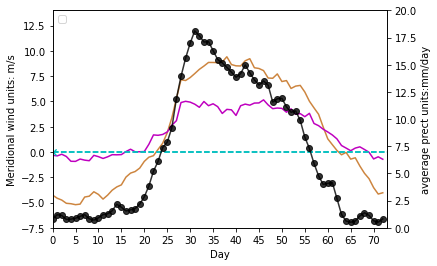

In [7]:
fig    =  plt.figure()
ax     =  fig.add_subplot(111)

ax.plot(np.arange(0,73),con_pentad_cross_56,color='peru')
ax.plot(np.arange(0,73),con_pentad_cross_89,color='m')

ax.set_xlim((0, 73))
ax.set_ylim((-7.5, 14))
ax.set_xticks(np.arange(0,73,5))

ax.plot([0,365],[0,0],'cx--')
ax.plot([0,365],[0,0],'cx--')

ax.legend(loc='upper left')

ax.set_ylabel("Meridional wind units: m/s")
ax.set_xlabel("Day")

ax2  =  ax.twinx()

ax2.set_ylim((0,20))
ax2.set_ylabel("avgerage prect units:mm/day")
ax2.plot(np.arange(0,73),prect_con_pentad*1.05,color='black',marker='o',alpha=0.8)



plt.savefig('/home/sun/paint/cross_equator_prect/famil_con_cross_equator_prect_pentad.pdf', bbox_inches='tight',dpi=1200)
plt.show()

No handles with labels found to put in legend.


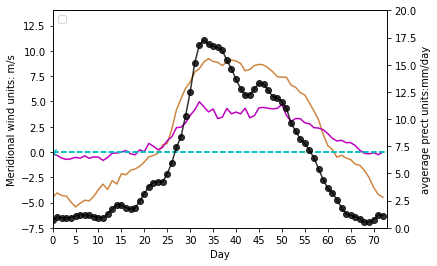

In [8]:
fig    =  plt.figure()
ax     =  fig.add_subplot(111)

ax.plot(np.arange(0,73),id_pentad_cross_56,color='peru')
ax.plot(np.arange(0,73),id_pentad_cross_89,color='m')

ax.set_xlim((0, 73))
ax.set_ylim((-7.5, 14))
ax.set_xticks(np.arange(0,73,5))

ax.plot([0,365],[0,0],'cx--')
ax.plot([0,365],[0,0],'cx--')

ax.legend(loc='upper left')

ax.set_ylabel("Meridional wind units: m/s")
ax.set_xlabel("Day")

ax2  =  ax.twinx()

ax2.set_ylim((0,20))
ax2.set_ylabel("avgerage prect units:mm/day")
ax2.plot(np.arange(0,73),prect_id_pentad*0.95,color='black',marker='o',alpha=0.8)



plt.savefig('/home/sun/paint/cross_equator_prect/famil_id_cross_equator_prect_pentad.pdf', bbox_inches='tight',dpi=1200)
plt.show()

No handles with labels found to put in legend.


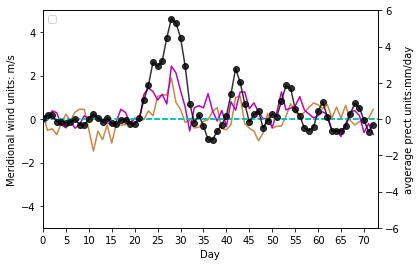

In [9]:
fig    =  plt.figure()
ax     =  fig.add_subplot(111)

ax.plot(np.arange(0,73),con_pentad_cross_56-id_pentad_cross_56,color='peru')
ax.plot(np.arange(0,73),con_pentad_cross_89-id_pentad_cross_89,color='m')

ax.set_xlim((0, 73))
ax.set_ylim((-5, 5))
ax.set_xticks(np.arange(0,73,5))

ax.plot([0,365],[0,0],'cx--')
ax.plot([0,365],[0,0],'cx--')

ax.legend(loc='upper left')

ax.set_ylabel("Meridional wind units: m/s")
ax.set_xlabel("Day")

ax2  =  ax.twinx()

ax2.set_ylim((-6,6))
ax2.set_ylabel("avgerage prect units:mm/day")
ax2.plot(np.arange(0,73),prect_con_pentad*1.05-prect_id_pentad*0.95,color='black',marker='o',alpha=0.8)



plt.savefig('/home/sun/paint/cross_equator_prect/famil_diff_cross_equator_prect_pentad.pdf', bbox_inches='tight',dpi=1200)
plt.show()

# 这里调整降水的选区范围看看效果

In [26]:
cross_equator_con   =   np.zeros((6,365))
cross_equator_id    =   np.zeros((6,365))
for i in range(40,100,10):
    cross_equator_con[int((i-40)/10),:]  =  cal_regional_average(v_con,(-10,10,i,i+10))
    cross_equator_id[int((i-40)/10),:]   =  cal_regional_average(v_id,(-10,10,i,i+10))

# 计算区域平均降水
prect_con.data[prect_con.data>100]  =  0
prect_id.data[prect_id.data>100]    =  0
bob_prect_con  =  cal_regional_average(prect_con,(15,25,90,100))
bob_prect_id   =  cal_regional_average(prect_id,(15,25,90,100))

# 这里计算一下降水的侯平均
prect_con_pentad  =  np.zeros((73))
prect_id_pentad   =  prect_con_pentad.copy()

for i in range(0,73):
    #prect_con_pentad[i]  =  np.average(bob_prect_con[i*5:i*5+5],axis=0)
    #prect_id_pentad[i]   =  np.average(np.convolve(bob_prect_id,np.ones(9)/9,mode='same')[i*5:i*5+5],axis=0)
    prect_id_pentad[i]    =  np.average(np.convolve(bob_prect_id,np.ones(15)/15,mode='same')[i*5:i*5+5],axis=0)
    prect_con_pentad[i]   =  np.average(np.convolve(bob_prect_con,np.ones(9)/9,mode='same')[i*5:i*5+5],axis=0)
    


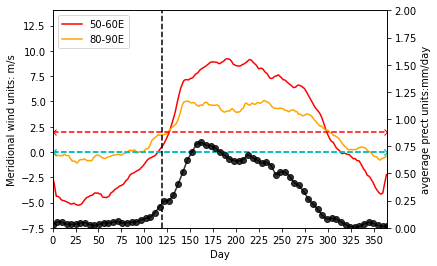

In [47]:
fig    =  plt.figure()
ax     =  fig.add_subplot(111)

ax.plot(filted_con[1],label=labels[1],color='red')
ax.plot(filted_con[4],label=labels[4],color='orange')

ax.set_xlim((0, 365))
ax.set_ylim((-7.5, 14))
ax.set_xticks(np.arange(0,365,25))

ax.plot([0,365],[0,0],'cx--')
ax.plot([0,365],[0,0],'cx--')
ax.plot([0,365],[2,2],'rx--')

ax.plot([119,119],[-7.5,14],'k--')

ax.legend(loc='upper left')

ax.set_ylabel("Meridional wind units: m/s")
ax.set_xlabel("Day")

ax2  =  ax.twinx()

ax2.set_ylim((0,2))
ax2.set_ylabel("avgerage prect units:mm/day")
ax2.plot(np.linspace(0,365,73),prect_con_pentad*1.06/24,color='black',marker='o',alpha=0.8)



plt.savefig('/home/sun/paint/cross_equator_prect/famil_con_cross_equator_prect_day.pdf', bbox_inches='tight',dpi=1200)
plt.show()

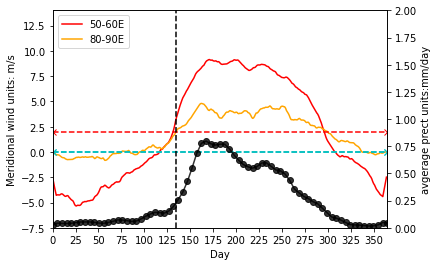

In [48]:
fig    =  plt.figure()
ax     =  fig.add_subplot(111)

ax.plot(filted_id[1],label=labels[1],color='red')
ax.plot(filted_id[4],label=labels[4],color='orange')

ax.set_xlim((0, 365))
ax.set_ylim((-7.5, 14))
ax.set_xticks(np.arange(0,365,25))

ax.plot([0,365],[0,0],'cx--')
ax.plot([0,365],[0,0],'cx--')
ax.plot([0,365],[2,2],'rx--')

ax.plot([135,135],[-7.5,14],'k--')

ax.legend(loc='upper left')

ax.set_ylabel("Meridional wind units: m/s")
ax.set_xlabel("Day")

ax2  =  ax.twinx()

ax2.set_ylim((0,2))
ax2.set_ylabel("avgerage prect units:mm/day")
ax2.plot(np.linspace(0,365,73),prect_id_pentad/24,color='black',marker='o',alpha=0.8)



plt.savefig('/home/sun/paint/cross_equator_prect/famil_id_cross_equator_prect_day.pdf', bbox_inches='tight',dpi=1200)
plt.show()

# 求pentad平均看看

In [33]:
cross_equator_con   =   np.zeros((6,365))
cross_equator_id    =   np.zeros((6,365))
for i in range(40,100,10):
    cross_equator_con[int((i-40)/10),:]  =  cal_regional_average(v_con,(-10,10,i,i+10))
    cross_equator_id[int((i-40)/10),:]   =  cal_regional_average(v_id,(-10,10,i,i+10))

# 计算区域平均降水
prect_con.data[prect_con.data>100]  =  0
prect_id.data[prect_id.data>100]    =  0
bob_prect_con  =  cal_regional_average(prect_con,(15,25,90,100))
bob_prect_id   =  cal_regional_average(prect_id,(15,25,90,100))

# 这里计算一下降水的侯平均
prect_con_pentad  =  np.zeros((73))
prect_id_pentad   =  prect_con_pentad.copy()

for i in range(0,73):
    #prect_con_pentad[i]  =  np.average(bob_prect_con[i*5:i*5+5],axis=0)
    #prect_id_pentad[i]   =  np.average(np.convolve(bob_prect_id,np.ones(9)/9,mode='same')[i*5:i*5+5],axis=0)
    prect_id_pentad[i]    =  np.average(np.convolve(bob_prect_id,np.ones(15)/15,mode='same')[i*5:i*5+5],axis=0)
    prect_con_pentad[i]   =  np.average(np.convolve(bob_prect_con,np.ones(9)/9,mode='same')[i*5:i*5+5],axis=0)
    
# 这里计算一下越赤道气流的侯平均
cross_con_pentad  =  np.zeros((6,73))
cross_id_pentad   =  np.zeros((6,73))
for i in range(0,6):
    for j in range(0,73):
        cross_con_pentad[i,j]  =  np.average(cross_equator_con[i,j*5:j*5+5],axis=0)
        cross_id_pentad[i,j]   =  np.average(cross_equator_id[i,j*5:j*5+5],axis=0)

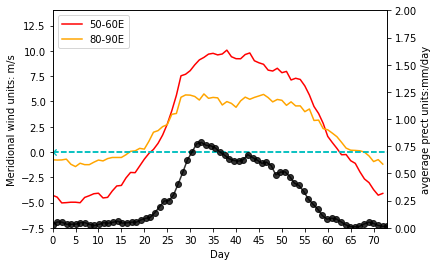

In [38]:
fig    =  plt.figure()
ax     =  fig.add_subplot(111)

ax.plot(cross_con_pentad[1],label=labels[1],color='red')
ax.plot(cross_con_pentad[4],label=labels[4],color='orange')

ax.set_xlim((0, 73))
ax.set_ylim((-7.5, 14))
ax.set_xticks(np.arange(0,73,5))

ax.plot([0,365],[0,0],'cx--')
ax.plot([0,365],[0,0],'cx--')

ax.plot([120,120],[-5,5])

ax.legend(loc='upper left')

ax.set_ylabel("Meridional wind units: m/s")
ax.set_xlabel("Day")

ax2  =  ax.twinx()

ax2.set_ylim((0,2))
ax2.set_ylabel("avgerage prect units:mm/day")
ax2.plot(np.linspace(0,73,73),prect_con_pentad*1.06/24,color='black',marker='o',alpha=0.8)



#plt.savefig('/home/sun/paint/cross_equator_prect/famil_con_cross_equator_prect_pentad.pdf', bbox_inches='tight',dpi=1200)
#plt.show()

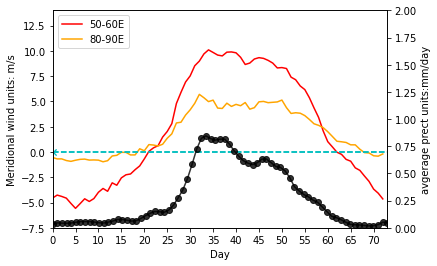

In [39]:
fig    =  plt.figure()
ax     =  fig.add_subplot(111)

ax.plot(cross_id_pentad[1],label=labels[1],color='red')
ax.plot(cross_id_pentad[4],label=labels[4],color='orange')

ax.set_xlim((0, 73))
ax.set_ylim((-7.5, 14))
ax.set_xticks(np.arange(0,73,5))

ax.plot([0,365],[0,0],'cx--')
ax.plot([0,365],[0,0],'cx--')

ax.plot([120,120],[-5,5])

ax.legend(loc='upper left')

ax.set_ylabel("Meridional wind units: m/s")
ax.set_xlabel("Day")

ax2  =  ax.twinx()

ax2.set_ylim((0,2))
ax2.set_ylabel("avgerage prect units:mm/day")
ax2.plot(np.linspace(0,73,73),prect_id_pentad*1.06/24,color='black',marker='o',alpha=0.8)



#plt.savefig('/home/sun/paint/cross_equator_prect/famil_con_cross_equator_prect_pentad.pdf', bbox_inches='tight',dpi=1200)
#plt.show()